In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x_train = np.array(np.load("x_train.npy"))
x_test = np.array(np.load("x_test.npy"))
x_val = np.array(np.load("x_val.npy"))
y_train = np.array(np.load("y_train.npy"))
y_test = np.array(np.load("y_test.npy"))
y_val = np.array(np.load("y_val.npy"))

x_train = x_train.reshape(-1, 96, 128, 1)
x_test = x_test.reshape(-1, 96, 128, 1)
x_val = x_val.reshape(-1, 96, 128, 1)

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu",
                                 input_shape = (96,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [10]:
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "gelu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [11]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "gelu"))

model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(64,
                                activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [13]:
model.add(tf.keras.layers.Dense(10,
                                activation="softmax"))

In [14]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
results = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 94s 2s/step - loss: 1.6973 - accuracy: 0.3953 - val_loss: 1.1486 - val_accuracy: 0.6110
Epoch 2/50
55/55 [==============================] - 95s 2s/step - loss: 1.2550 - accuracy: 0.5686 - val_loss: 0.9480 - val_accuracy: 0.6636
Epoch 3/50
55/55 [==============================] - 96s 2s/step - loss: 1.0983 - accuracy: 0.6241 - val_loss: 0.7631 - val_accuracy: 0.7620
Epoch 4/50
55/55 [==============================] - 93s 2s/step - loss: 0.9567 - accuracy: 0.6776 - val_loss: 0.7477 - val_accuracy: 0.7540
Epoch 5/50
55/55 [==============================] - 93s 2s/step - loss: 0.8645 - accuracy: 0.7072 - val_loss: 0.6312 - val_accuracy: 0.8078
Epoch 6/50
55/55 [==============================] - 95s 2s/step - loss: 0.7740 - accuracy: 0.7349 - val_loss: 0.5819 - val_accuracy: 0.8204
Epoch 7/50
55/55 [==============================] - 93s 2s/step - loss: 0.7177 - accuracy: 0.7515 - val_loss: 0.5614 - val_accuracy: 0.8181
Epoch 8/50
55/55 [==

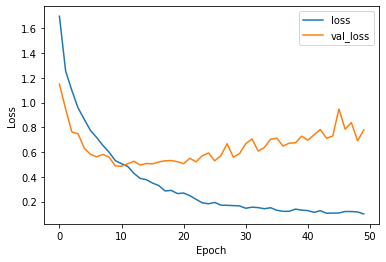

In [16]:
plt.plot(results.history["loss"], label="loss")

plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

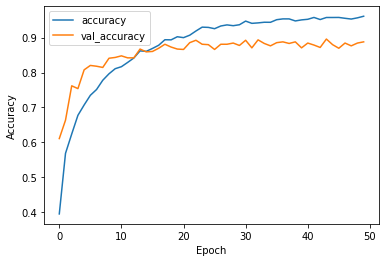

In [17]:
plt.plot(results.history["accuracy"], label="accuracy")

plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [18]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 3s 121ms/step - loss: 0.7867 - accuracy: 0.8717


[0.7866755127906799, 0.8717067837715149]